In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
from data_helper import *
log_name = "svr"

In [4]:
from sklearn.svm import SVR

Will test on linear and rbf kernels. Think epsilon should be 1 minmum - ie to the nearest penny. We can change this to 10p possibly if it yields better results (probably in terms of training times)

In [5]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler().fit(dataset_in["train"]["full"])

X_train = scaler.transform(dataset_in["train"]["full"])
y_train = dataset_in["train"]['y']

X_val = scaler.transform(dataset_in["val"]["full"])
y_val = dataset_in["val"]['y']

In [39]:
cs = [10**i for i in range(-2, 5)]

In [40]:
lin_train_scores = []
lin_val_scores = []

for c in cs:
    print(c)
    model = SVR(kernel = 'linear', C = c, epsilon = 1, max_iter = 1e5)
    model.fit(X_train, y_train)
    lin_train_scores.append(model.score(X_train, y_train))
    lin_val_scores.append(model.score(X_val, y_val))

0.01
0.1
1


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


10


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


100


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


1000


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


10000


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [41]:
rbf_train_scores = []
rbf_val_scores = []

for c in cs:
    print(c)
    model = SVR(kernel = 'rbf', C = c, epsilon = 1, max_iter = 1e5)
    model.fit(X_train, y_train)
    rbf_train_scores.append(model.score(X_train, y_train))
    rbf_val_scores.append(model.score(X_val, y_val))

0.01
0.1
1
10
100


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


1000


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


10000


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


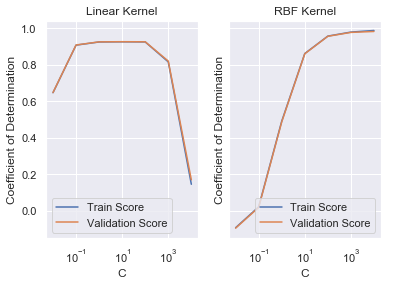

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
ax1.plot(cs, lin_train_scores, label = "Train Score")
ax1.plot(cs, lin_val_scores, label = "Validation Score")
ax1.legend()
ax1.set_xlabel("C")
ax1.set_ylabel("Coefficient of Determination")
ax1.set_title("Linear Kernel")
ax1.set_xscale('log')

ax2.plot(cs, rbf_train_scores, label = "Train Score")
ax2.plot(cs, rbf_val_scores, label = "Validation Score")
ax2.legend()
ax2.set_xlabel("C")
ax2.set_ylabel("Coefficient of Determination")
ax2.set_title("RBF Kernel")
ax2.set_xscale('log')

plt.savefig(r"C:\Users\User\Documents\4. Fourth Year\Project\Write Up Artifacts\ML\SVR C Values.png", dpi = 300)

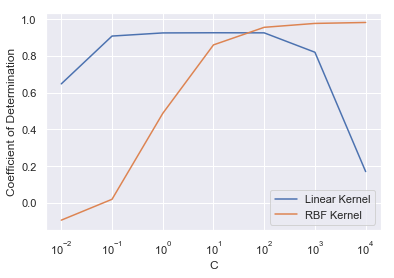

In [44]:
plt.plot(cs, lin_val_scores, label = "Linear Kernel")
plt.plot(cs, rbf_val_scores, label = "RBF Kernel")
plt.xscale("log")
plt.legend()
plt.xlabel("C")
plt.ylabel("Coefficient of Determination")

plt.savefig(r"C:\Users\User\Documents\4. Fourth Year\Project\Write Up Artifacts\ML\SVR C Val Scores.png", dpi = 300)

In [45]:
check_on_dataset(scaled_model, "svr_linear", log_name, final_model = SVR, kernel = 'linear', C = 0.1, max_iter =1e6, epsilon = 0.5, iterations = 25)

Subset: dist, 25/25
Subset: full, 25/25
Subset: simd, 25/25
Subset: dist_time, 25/25
Subset: dist_remoteness, 25/25


In [46]:
check_on_dataset(scaled_model, "svr_rbf", log_name, final_model = SVR, kernel = 'rbf', C = 1000, max_iter =1e6, epsilon = 0.5, iterations = 25)

Subset: dist, 25/25
Subset: full, 25/25
Subset: simd, 25/25
Subset: dist_time, 25/25
Subset: dist_remoteness, 25/25


In [6]:
pca_values = {'dist': 1, 'dist_time': 2, 'dist_remoteness': 6, 'full': 8, 'simd': 11}
for subset in pca_values.keys():
    for i in range(25):
        print(f"{subset} - {i+1}/25", end = '\r')
        fit_and_evaluate_ML_model(PCA_model, "pca_svr", dataset_in, subset, log_name, final_model = SVR, n_components = pca_values[subset], iterate=True,
                                 kernel = 'rbf', C = 1000, max_iter = 1e7, epsilon = 0.5)
    print("")

dist - 25/25
dist_time - 25/25
dist_remoteness - 25/25
full - 25/25
simd - 25/25
